In [32]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
data = load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
data.data.shape

(1797, 64)

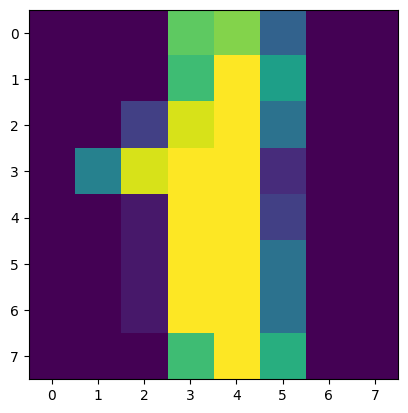

In [9]:
plt.imshow(data.data[1].reshape(8, 8))

In [10]:
data.data[1].shape

(64,)

input -> 64 neurons
hl1 -> 30 (relu)
hl2 -> 10 (softmax)
loss function -> categorical cross entopy

In [84]:
class DenseLayer:
  def __init__(self, prev, cur):
    self.input_size = prev
    self.output_size = cur
    self.W = np.random.randn(self.output_size, self.input_size) * 0.01
    self.b = np.zeros((self.output_size, 1))

  def forward_pass(self, input, activation):
    z = np.dot(self.W, input) + self.b
    activations = None
    if (activation == 'relu'):
      return np.maximum(0, z)
    elif (activation == 'softmax'):
      exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
      return exp_z / np.sum(exp_z, axis=0, keepdims=True)

  def backward_pass(self, prev_activations, dZ, activation):
    if (activation == 'relu'):
      z = np.dot(self.W, prev_activations) + self.b
      z = np.maximum(0, z)
      mask = z > 0
      dZ = dZ * mask
    dW = np.dot(dZ, prev_activations.T)
    new_gradiant = np.dot(self.W.T, dZ)
    self.W = self.W - (0.01 * dW)
    self.b = self.b - (0.01 * dZ)
    return new_gradiant

In [85]:
layer1 = DenseLayer(64, 192)
layer2 = DenseLayer(192, 10)

In [86]:
def forward(X):
  a1 = layer1.forward_pass(X, 'relu')
  a2 = layer2.forward_pass(a1, 'softmax')
  return a1, a2

In [87]:
def backward(a1, a2, error, X, idx):
  new_errow = layer2.backward_pass(a1, error, 'softmax')
  layer1.backward_pass(X[idx].reshape(64, 1), new_errow, 'relu')

In [88]:
def training(X, y, epochs):
  for i in range(X.shape[0] * epochs):
    idx = np.random.randint(X.shape[0])
    a1, a2 = forward(X[idx].reshape(X[idx].shape[0], 1))
    print(-np.log(a2[y[idx]].item()))
    y_idx = np.zeros((10, 1))
    y_idx[y[idx]] = 1
    error = a2 - y_idx
    backward(a1, a2, error, X, idx)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.7)
training(X_train, y_train, 100)



Streaming output truncated to the last 5000 lines.
8.881784197001256e-16
3.254414812857259e-08
3.99331047320126e-08
1.8397505741232702e-11
9.927487384954641e-07
8.761184591083652e-05
9.459100169810807e-13
3.65480602006555e-09
4.6629367034256685e-15
2.0206059048178054e-14
4.6629367034256685e-15
6.923817075472515e-11
-0.0
8.320061178395933e-07
4.7739590058882874e-14
1.0980061305224622e-10
1.0702549957387082e-13
2.3356516723423796e-10
1.475708444332847e-12
-0.0
2.7857365342220287e-09
1.886713008049771e-12
9.811207406879192e-10
4.7195580776926775e-12
1.527666881884332e-13
1.2689025355464647e-08
-0.0
1.3322676295501888e-15
1.255045703960604e-07
1.527666881884332e-13
1.1277145206995763e-06
1.1007434114942816e-07
6.451885028130239e-07
2.3492319201071074e-13
5.636062579285736e-05
1.1990408665951763e-14
3.72604238590074e-05
7.215323031768571e-09
9.455421791648796e-05
-0.0
3.699668891770621e-05
6.409601740309483e-10
1.1126655153412332e-10
1.543942751437139e-11
5.492386973956488e-08
-0.0
6.141169

In [90]:
y_pred = []
for idx in range(X_test.shape[0]):
  a1, a2 = forward(X_test[idx].reshape(64, 1))
  y_pred.append(np.argmax(a2))
y_pred = np.array(y_pred)
np.mean(y_pred == y_test)

np.float64(0.965818759936407)

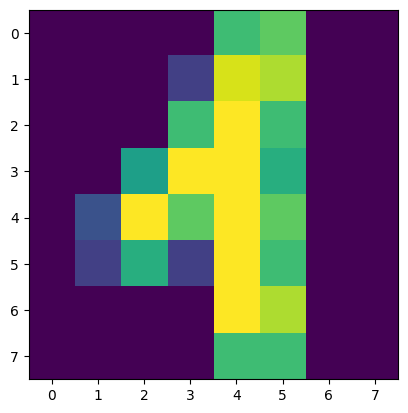

In [96]:
plt.imshow(data.data[200].reshape(8, 8))

In [101]:
a1, a2 = forward(data.data[200].reshape(64, 1))
np.argmax(a2)

np.int64(1)